In [1]:
import numpy as np
from scipy import stats

In [2]:
class NBC:

    def __init__(self, feature_types, num_classes):
        self.feature_types = np.array(feature_types)
        self.num_classes = num_classes

    def fit(self, X, y):

        self.pi = []
        self.mean = []
        self.std = []
        self.ber = []
        
        for c in range(self.num_classes):
            # select the rows based on c
            Xc = X[np.flatnonzero(y == c)]
            self.pi.append(len(Xc) / len(y))
            
            Xcr = Xc[:, np.flatnonzero(self.feature_types == 'r')]
            
            # Find the mean of the x
            if Xcr.size == 0:
                self.mean.append([])
            else:
                self.mean.append(np.mean(Xcr, axis=0))
            
            self.std.append(np.clip(np.std(Xcr, axis=0), 1e-6, None))

            Xcb = Xc[:, np.flatnonzero(self.feature_types == 'b')]
            self.ber.append((np.sum(Xcb, axis=0) + 1) / (len(Xcb) + 2))

    def predict(self, X):
        # n x 1 array for y hat
        y_hat = np.repeat(np.reshape(self.pi, (-1, 1)), len(X), axis=1)
        
        
        for c in range(self.num_classes):

            Xr = X[:, np.flatnonzero(self.feature_types == 'r')]
            logr = np.sum(stats.norm.logpdf(Xr, self.mean[c], self.std[c]), axis=1)

            Xb = X[:, np.flatnonzero(self.feature_types == 'b')]
            logb = np.sum(stats.bernoulli.logpmf(Xb, self.ber[c]), axis=1)

            y_hat[c] += logr + logb

        return np.argmax(y_hat, axis=0)
            

In [3]:
pi = [1,2,3]
y_hat = np.reshape(pi, (-1, 1))
y_hat[2]+=10
y_hat
np.argmax(y_hat)

2

In [4]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

def learn(X, y, nbc, lr):

    num_classes = np.unique(y).size
    N, _ = X.shape
    N_train = int(0.8 * N)
    N_step = int(N / 50)
    N_range = range(int(N / 25), N + 1, N_step)
    N_percent = np.array(N_range) * 100 / N

    error_rates_nbc = []
#     error_rates_lr = []

    for _ in range(1000):

        while True:

            error_rates_nbc_round = []
#             error_rates_lr_round = []

            shuffler = np.random.permutation(N)
            X_train, X_test = X[shuffler[:N_train]], X[shuffler[N_train:]]
            y_train, y_test = y[shuffler[:N_train]], y[shuffler[N_train:]]

            if np.unique(y_train[:N_step]).size != num_classes:
                continue

            for n in N_range:

                nbc.fit(X_train[:n], y_train[:n])
#                 lr.fit(X_train[:n], y_train[:n])

                y_hat_nbc = nbc.predict(X_test)
#                 y_hat_lr = lr.predict(X_test)

                error_rates_nbc_round.append(np.mean(y_hat_nbc != y_test))
#                 error_rates_lr_round.append(np.mean(y_hat_lr != y_test))

            break

        error_rates_nbc.append(error_rates_nbc_round)
#         error_rates_lr.append(error_rates_lr_round)

    error_rates_nbc = np.mean(error_rates_nbc, axis=0)
#     error_rates_lr = np.mean(error_rates_lr, axis=0)

    plt.plot(N_percent, error_rates_nbc, 'r-')
#     plt.plot(N_percent, error_rates_lr, 'b-')
    
    plt.xlabel('% of Training Set')
    plt.ylabel('Error Rate')
    plt.legend(['NBC', 'Logistic Regression'])

    plt.show()

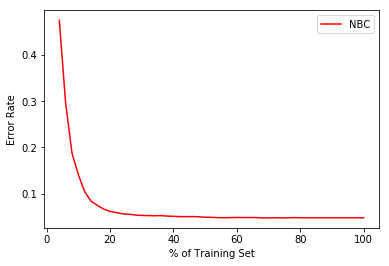

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris['data'], iris['target']

learn(X, y,
      NBC(feature_types=['r'] * 4, num_classes=3),
      LogisticRegression(C=5, solver='liblinear', multi_class='ovr'))

In [6]:
for i in pi:
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-6-985cdd6a8c8d>, line 3)